# matplotlib 

matplotlib is a library to plot data

In [1]:
import matplotlib.pyplot as plt

def plot_chart(x, y, xLabel = '', yLabel='', title=''):
    """
    Plot a chart for x, y. 
    
    The number of elements in x and y shall be the same. 
    """
    plt.plot(x, y)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.title(title)
    plt.show()

# plot a sample graph

x is index of points

y is the value, which correlated with x and random value

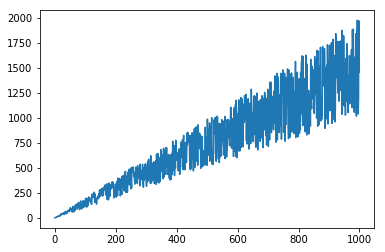

In [2]:
import random
num_points = 1000
x = range(num_points)
y = [random.random()*i + i for i in x]
plot_chart(x, y)

# Compute mean error

for given paramter `m` and `b` for all `points` in equeation 


$$
\begin{align*}
y = mx + b
\end{align*}
$$

computer the mean error

In [3]:
# y = mx + b
# m is slope, b is y-intercept
def mean_error(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

# calculate gradient (the delivetive)

for current m and b, calculate the gradient

In [4]:
def gradient(b_current, m_current, points):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    return [m_gradient, b_gradient]

In [52]:
theta = np.zeros(2)
x = points[:, 0]

In [54]:
x

array([ 32.50234527,  53.42680403,  61.53035803,  47.47563963,
        59.81320787,  55.14218841,  52.21179669,  39.29956669,
        48.10504169,  52.55001444,  45.41973014,  54.35163488,
        44.1640495 ,  58.16847072,  56.72720806,  48.95588857,
        44.68719623,  60.29732685,  45.61864377,  38.81681754,
        66.18981661,  65.41605175,  47.48120861,  41.57564262,
        51.84518691,  59.37082201,  57.31000344,  63.61556125,
        46.73761941,  50.55676015,  52.22399609,  35.56783005,
        42.43647694,  58.16454011,  57.50444762,  45.44053073,
        61.89622268,  33.09383174,  36.43600951,  37.67565486,
        44.55560838,  43.31828263,  50.07314563,  43.87061265,
        62.99748075,  32.66904376,  40.16689901,  53.57507753,
        33.86421497,  64.70713867,  38.11982403,  44.50253806,
        40.59953838,  41.72067636,  51.08863468,  55.0780959 ,
        41.37772653,  62.49469743,  49.20388754,  41.10268519,
        41.18201611,  50.18638949,  52.37844622,  50.13

# gradient decent

gradient decent for `points`, with `starting_m` and `starting_b`, and `learning_rate`

run maximum interation `max_num_iterations`. interation will stop is the impovement is smaller then `epsilon`

the return value has final `[m, b, errors]`

- errors contains the error for each iteration
- `len(errors)` is the number interation ran

In [9]:
def gradient_descent(points, starting_m, starting_b, learning_rate, max_num_iterations, epsilon=0.01):
    b = starting_b
    m = starting_m
    errors = []
    
    # This is the initial mean error
    previous_error = mean_error(b, m, points)
    errors.append(previous_error)
    
    
    for i in range(max_num_iterations):
        m_gradient, b_gradient = gradient(b, m, np.array(points))
        
        # decent towards gradient
        #
        # when the slope is sharp (large derivitive), value m and b will change faster
        m = m - (learning_rate * m_gradient)
        b = b - (learning_rate * b_gradient)
        
        error = mean_error(b, m, points)
        errors.append(error)
        
        improvement = previous_error / error - 1.0        
        
        previous_error = error

        if improvement < epsilon:
            print('improvement already small enough, stop run', improvement)
            break
        
    return [m, b, errors]

# Load data

In [49]:
import numpy as np

points = np.genfromtxt("data/gradient-decent.csv", delimiter=",")

In [48]:
learning_rate = 0.0001
initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 1000
epsilon = 0.0001

msg = "Starting gradient descent at intial m = {0},  b = {1}".format(
    initial_m, initial_b)
print(msg, " ...")

[m, b, errors] = gradient_descent(points, initial_m, initial_b, learning_rate, num_iterations, epsilon)
msg = "After {0} iterations m = {1}, b = {2}, error = {3}".format(
    len(errors), m, b, errors[-1])
print (msg)


Starting gradient descent at intial m = 0,  b = 0  ...
improvement already small enough, stop run 3.71669376162e-05
After 12 iterations m = 1.4781595857319891, b = 0.029714049245227046, error = 112.65166489759584


# scatterplot for original points

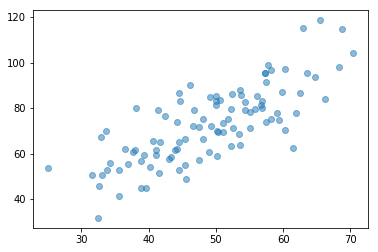

In [27]:
x = [point[0] for point in points]
y = [point[1] for point in points]

plt.plot(x, y, 'o', alpha=0.5)
plt.show()

# Calculate the line 

In [44]:

min_x, max_x = min(x), max(x)

x0 = min_x
y0 = m * x0 + b
x1 = max_x
y1 = m * x1 + b

# Plot gradient decent result

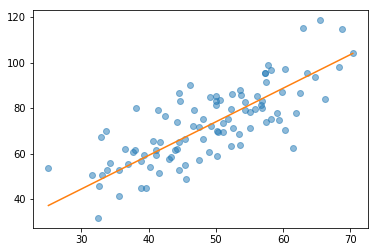

In [46]:
plt.plot(x, y, 'o', alpha=0.5)
plt.plot([x0, x1], [y0, y1])

plt.show()

# Chart number of iteration over mean error

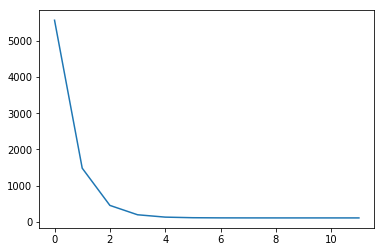

In [20]:
plot_chart(range(len(errors)), errors)